# Q15
Tree Based Models - Q15- 21st July


The average starting salary of MBA graduates in US is provided in the file 08_MBA_Starting_Salary.xlsx.
Link: https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

Use the variables below to predict the Avg Starting salary:

        Type  
        Enrollment  
        Avg GMAT  
        Resident Tuition, Fees  
        Pct International  
        Pct Female  
        Pct Asian American  
        Pct Minority  
        Pct with job offers

    1) Train a Decision tree by dropping  the rows with missing values 
    2) Impute the missing values in each column using KNN imputer, and then train a model 
    3) Compare the score of both the above models.  Use 5 fold CV score in both cases, with same model 
       hyper-parameters (depth, etc)

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("08_MBA_Starting_Salary.xlsx", sheet_name = "MBA Data")
print(df.shape)
df.head(2)

(70, 13)


,Fulltime Business Week Ranking,School Name,State,Type,Enrollment,Avg GMAT,"Resident Tuition, Fees",Pct International,Pct Female,Pct Asian American,Pct Minority,Pct with job offers,Avg starting base salary
0,1,University of Chicago,Illinois,Private,1144,713.0,97165.0,35.0,35.0,16.0,7.0,92.0,107091.0
1,2,Harvard University,Massachusetts,Private,1801,720.0,101660.0,33.0,38.0,NaN,NaN,94.0,124378.0


In [3]:
df.columns

Index(['Fulltime Business Week Ranking', 'School Name', 'State', 'Type',
       'Enrollment', 'Avg GMAT', 'Resident Tuition, Fees', 'Pct International',
       'Pct Female', 'Pct Asian American', 'Pct Minority',
       'Pct with job offers', 'Avg starting base salary'],
      dtype='object')

In [4]:
vrb_list = ['Type', 'Enrollment', 'Avg GMAT', 'Resident Tuition, Fees', 'Pct International',
            'Pct Female', 'Pct Asian American', 'Pct Minority', 'Pct with job offers'
           ]
target = 'Avg starting base salary'
df_model = df[vrb_list + [target]]
df_model = pd.get_dummies(df_model, columns=['Type'])
#df_model.head(2)

In [5]:
x_var = ['Enrollment', 'Avg GMAT', 'Resident Tuition, Fees', 'Pct International',
         'Pct Female', 'Pct Asian American', 'Pct Minority',
         'Pct with job offers', 'Type_Private', 'Type_Public'
        ]

In [6]:
# 1. Drop rows, having na
df_model_1 = df_model.dropna()
print(df_model_1.shape)
print(df_model.shape)

(60, 11)
(70, 11)


In [7]:
# 2. Use knn imputer for treating missing values
df_x = df_model[x_var]
imputer = KNNImputer(n_neighbors=2)
df_x = imputer.fit_transform(df_x)
df_model_2 = pd.DataFrame(df_x, columns=x_var)
df_model_2[target] = df_model[target]
print(df_model_2.shape)
#df_model_2.head(2)

(70, 11)


In [8]:
#df_model.head(2)

In [9]:
# tune hyper-parameters on 1st data, and use these parameters for second case as well

In [10]:
tune_parm_space = {'min_samples_split':range(1, 20),
                   'max_depth':range(1, 20),
                   'min_samples_leaf':range(1, 20)
                  }

tree_reg_model = DecisionTreeRegressor(random_state=1)
tree_reg_model_cv_1 = GridSearchCV(tree_reg_model, tune_parm_space, cv=5)
tree_reg_model_cv_1.fit(df_model_1[x_var], df_model_1[target])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 20)})

In [11]:
tree_reg_model_cv_1.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [12]:
# remove rows, where target variable is missing
df_model_2 = df_model_2[~ df_model_2[target].isnull()]
df_model_2.shape

(67, 11)

In [13]:
tune_parm_space = {'min_samples_split':[2],
                   'max_depth':[7],
                   'min_samples_leaf':[2]
                  }

tree_reg_model = DecisionTreeRegressor(random_state=1)
tree_reg_model_cv_2 = GridSearchCV(tree_reg_model, tune_parm_space, cv=5)
tree_reg_model_cv_2.fit(df_model_2[x_var], df_model_2[target])

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [7], 'min_samples_leaf': [2],
                         'min_samples_split': [2]})

In [14]:
def plot_qq_plot(model, df, x_vars, y_var):
    pred = model.predict(df[x_vars])
    residual = df[y_var] - pred

    mean_of_residual = np.mean(residual.values) 
    std_of_residual = np.std(residual.values)
    std_residual = (residual.values - mean_of_residual) / std_of_residual
    sm.qqplot(std_residual, line ='45');
    return

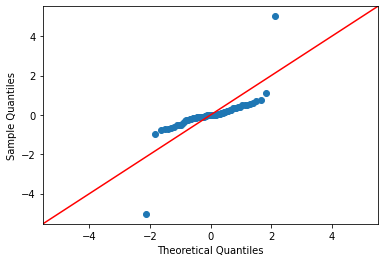

In [15]:
plot_qq_plot(tree_reg_model_cv_1, df_model_1, x_var, target)

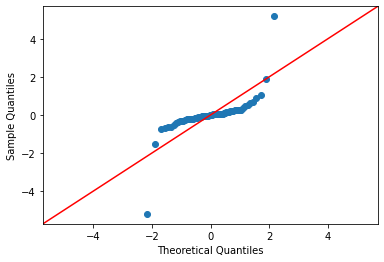

In [16]:
plot_qq_plot(tree_reg_model_cv_2, df_model_2, x_var, target)

In [17]:
print(tree_reg_model_cv_1.best_params_)
print(tree_reg_model_cv_2.best_params_)

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [18]:
score_1 = tree_reg_model_cv_1.score(df_model_1[x_var], df_model_1[target])
score_2 = tree_reg_model_cv_2.score(df_model_2[x_var], df_model_2[target])

rmse_1 = mean_squared_error(df_model_1[target], tree_reg_model_cv_1.predict(df_model_1[x_var]), squared=False)
rmse_2 = mean_squared_error(df_model_2[target], tree_reg_model_cv_2.predict(df_model_2[x_var]), squared=False)

print(f"Model 1 R square is {np.round(score_1 * 100, 2)} and RMSE is {np.round(rmse_1, 2)}")
print(f"Model 2 R square is {np.round(score_2 * 100, 2)} and RMSE is {np.round(rmse_2, 2)}")

Model 1 R square is 83.88 and RMSE is 6153.54
Model 2 R square is 86.34 and RMSE is 5947.53


# Answers:
    1. With Model 1, we get R square is 83.88 and RMSE is 6153.54
    2. With Model 2, we get R square is 86.34 and RMSE is 5947.53
    3. Model parameter in both cases :
        - {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
    4. We see marginal improvement in performance of model, after imputing for missing values in x variables, 
       using knn imputer